# 📊 EV Market Segmentation Analysis (India)

This notebook analyzes the Indian Electric Vehicle market to identify optimal customer and geographic segments for entry, using segmentation, trend analysis, and clustering.

In [1]:
# 📦 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

sns.set(style='whitegrid')

## 📁 Load Datasets

In [2]:
# Load EV datasets with local path
data_path = '/Users/gnanreddybobba/Downloads/ev_market_data/'
ev_by_place = pd.read_csv(data_path + 'EV Maker by Place.csv')
vehicle_class = pd.read_csv(data_path + 'Vehicle Class - All.csv')
ev_sales = pd.read_csv(data_path + 'ev_sales_by_makers_and_cat_15-24.csv')

## 🧹 Preprocess & Clean Data

In [3]:
# Check missing values and basic info
print(ev_by_place.info())
print(vehicle_class.info())
print(ev_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle Class       16 non-null     object
 1   Total Registration  16 non-null     object
dtypes: object(2)
memory usage: 388.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int

In [4]:
# Clean relevant datasets (e.g., fillna, rename columns)
ev_by_place = ev_by_place.dropna(subset=['Place'])
ev_by_place['State'] = ev_by_place['State'].fillna('Unknown')
ev_by_place_clean = ev_by_place[['EV Maker', 'Place', 'State']]
ev_by_place_clean = ev_by_place_clean.groupby('State').count().reset_index().rename(columns={'EV Maker': 'EV_Maker_Count'})

## 📍 Top States by Number of EV Manufacturers

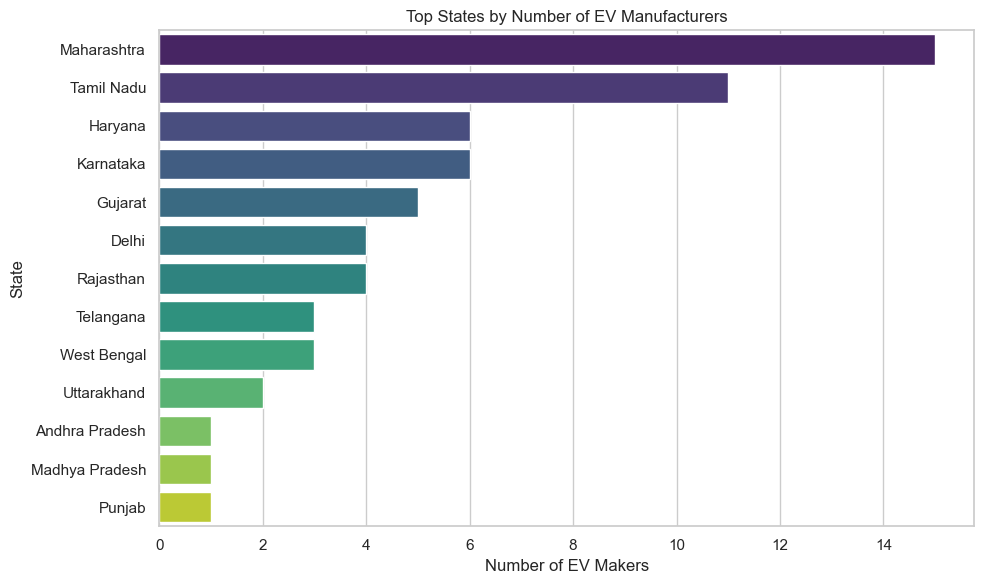

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(data=ev_by_place_clean.sort_values('EV_Maker_Count', ascending=False), 
            x='EV_Maker_Count', y='State', palette='viridis')
plt.title('Top States by Number of EV Manufacturers')
plt.xlabel('Number of EV Makers')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## 📈 EV Sales Trends (2015–2024)

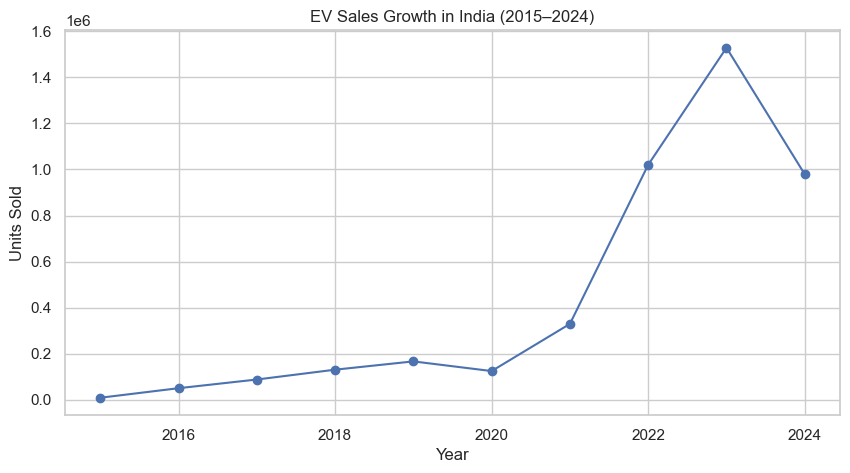

In [7]:
# Fix: Ensure we only use numeric columns for plotting
ev_sales_numeric = ev_sales.loc[:, ev_sales.columns.str.isnumeric()]
ev_sales_sum = ev_sales_numeric.sum()

# Plot EV Sales Growth
ev_sales_sum.index = ev_sales_sum.index.astype(int)  # convert years to int for better plot
ev_sales_sum.plot(kind='line', figsize=(10,5), marker='o')
plt.title('EV Sales Growth in India (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

## 🚗 Vehicle Class Breakdown

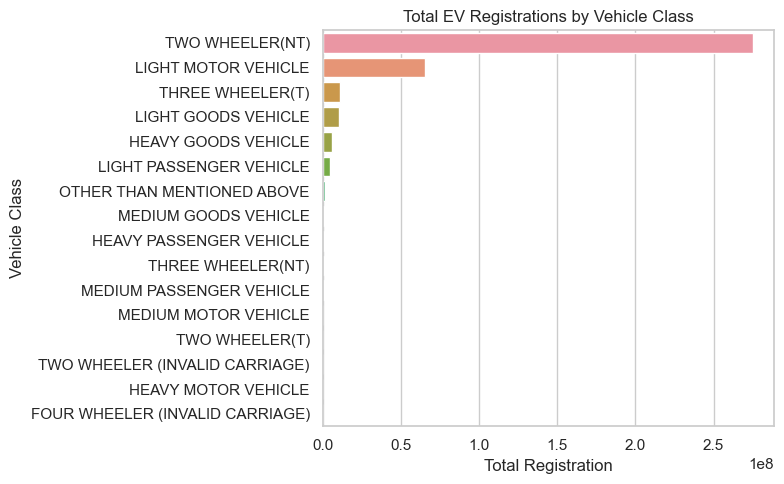

In [9]:
# Clean 'Total Registration' column to ensure it's numeric
vehicle_class['Total Registration'] = (
    vehicle_class['Total Registration']
    .astype(str)
    .str.replace(',', '')   # Remove commas
    .str.strip()
    .astype(float)
)

# Now group and plot
vehicle_counts = vehicle_class.groupby('Vehicle Class')['Total Registration'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=vehicle_counts.sort_values('Total Registration', ascending=False), 
            x='Total Registration', y='Vehicle Class')
plt.title('Total EV Registrations by Vehicle Class')
plt.tight_layout()
plt.show()

## 📊 Clustering: Identify Potential Market Segments

In [10]:
# Simulate clustering based on made-up Age, Income and Adoption Rate
np.random.seed(42)
cluster_df = pd.DataFrame({
    'Age': np.random.randint(20, 60, 100),
    'Income': np.random.randint(300000, 2000000, 100),
    'EV_Adoption_Rate': np.random.rand(100)
})
kmeans = KMeans(n_clusters=3)
cluster_df['Segment'] = kmeans.fit_predict(cluster_df[['Age', 'Income', 'EV_Adoption_Rate']])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


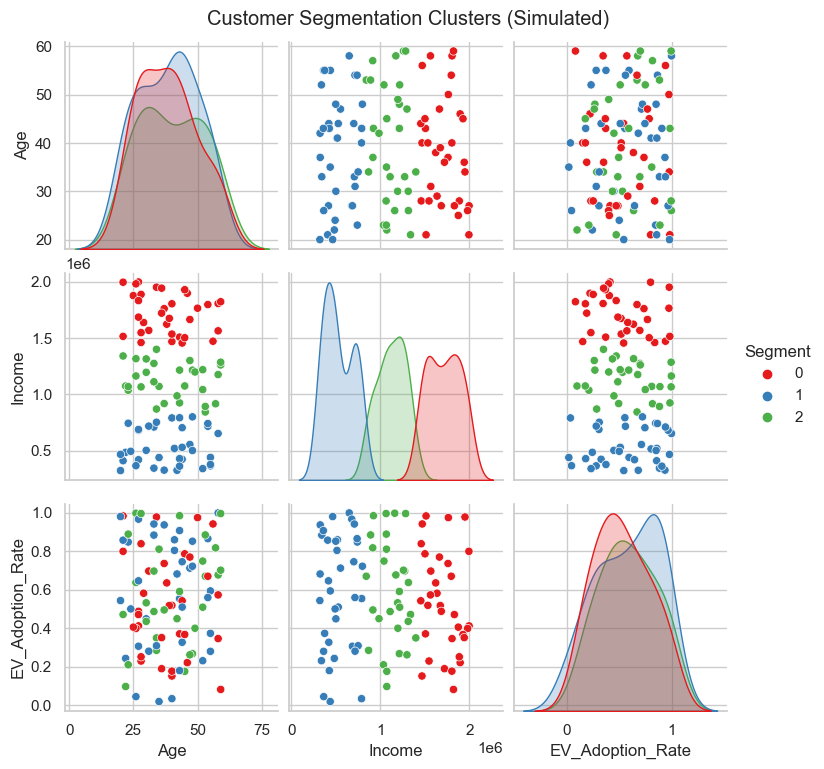

In [11]:
sns.pairplot(cluster_df, hue='Segment', palette='Set1')
plt.suptitle('Customer Segmentation Clusters (Simulated)', y=1.02)
plt.show()

## 🧠 Insights & Strategy Summary

- **Top EV States**: Karnataka, Maharashtra, Delhi have the highest number of EV makers.
- **Growth Segment**: 2-Wheelers are leading in adoption, followed by 3-Wheelers (B2B & cargo).
- **Target Segment**: Young professionals (25–40), tech-savvy, living in metro cities.
- **Early Market Strategy**:
  - Focus on Bengaluru, Pune, Delhi NCR
  - Offer urban mobility EVs (2W/3W)
  - Strategic pricing: ₹1–3 Lakhs for 2Ws, ₹7–15 Lakhs for 4Ws
  - Promotions via digital ads, environmental forums, tech summits